In [223]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import networkx as nx

In [235]:
# cria uma rede de mundo pequeno, sendo N o número de nós,
# Z o número (PAR) de vizinhos próximos de cada nó e
# p a taxa de atalhos, isto é, arestas que ligam os nós possivelmente distantes
def cria_rede(N,Z,p):
    grafo = nx.Graph()
    
    # cria nós numerados de 0 até N-1
    for i in range(N):
        grafo.add_node(i)
    
    # cria as arestas que ligam os vizinhos
    for i in range(N):
        for j in range(1,int(Z/2)+1):
            grafo.add_edge(i, (i+j)%N)
            grafo.add_edge(i, (i-j)%N)
            
    # cria as arestas que possivelmente são atalhos
    atalhos = int(p*N*Z/2)
    for _ in range(atalhos):
        a = np.random.randint(0,N)
        b = np.random.randint(0,N)
        grafo.add_edge(a,b)
    
    return grafo

In [236]:
def FindPathLengthsFromNode(graph, node):
    #Passo 0
    d = 0
    viz = np.array([n for n in grafo.neighbors(node)])
    
    percorridos = np.array([])
    percorridos = np.append(percorridos, node)
    
    # distancias[node2] é a distancia de node até node2
    distancias = np.zeros(graph.order()) 
    
    #Passo 1
    d = 1
    for vizinho in viz:
        vizinho = int(vizinho)

        distancias[vizinho] = d
        percorridos = np.append(percorridos, vizinho)
    percorridos = np.unique(percorridos)
    
    #Demais passos
    while len(percorridos) != graph.order(): 
        aux = np.array([])
        for vizinho in viz:
            vizinho = int(vizinho)
            aux = np.append(aux, np.array([n for n in grafo.neighbors(vizinho)]))
            
        viz = np.unique(aux)
        viz = np.setdiff1d(viz,percorridos)
        
        d += 1
        for vizinho in viz:
            vizinho = int(vizinho)
            distancias[vizinho] = d
            percorridos = np.append(percorridos, vizinho)
        percorridos = np.unique(percorridos)
        
    return distancias

In [447]:
def FindAllPathLengths(graph):
    distancias = np.zeros((graph.order(),graph.order()))
    for i in range(graph.order()):
        distancias[i] = FindPathLengthsFromNode(graph, i)
        
    return distancias

In [478]:
def FindAveragePathLength(graph):
    media = 0
    a = 0
    distancias = FindAllPathLengths(graph)
    for i in range(0,N):
        for j in range(i+1,N):
            media += distancias[i][j]
    media = (media*2)/(N*(N-1))
    return media

N = 1000, Z = 2 e p = 0.02

20
121.0


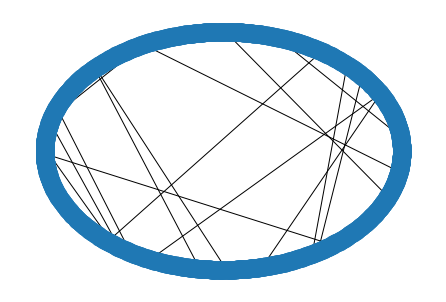

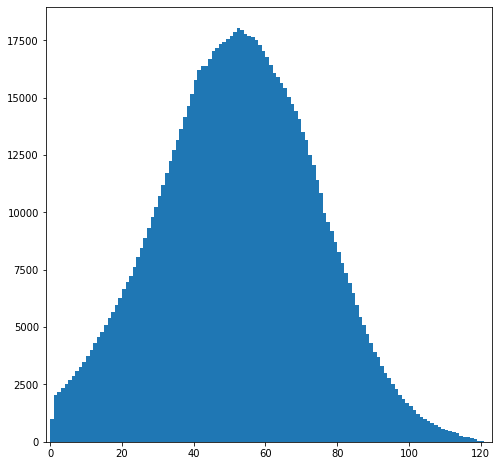

In [467]:
N=1000
Z=2
p=0.02
atalhos = int(p*N*Z/2)
print(atalhos)

grafo = cria_rede(N,Z,p)
nx.draw_circular(grafo)

distancias_2 = FindAllPathLengths(grafo)

beiradas = np.linspace(0,int(N/2)+1,int(N/2)+2)

aux = np.zeros(N*N)
for i in range(N):
    for j in range(N):
        aux[i*N + j] = distancias_2[i,j]
        
plt.figure(figsize=(8,8))
plt.hist(aux,beiradas)
a = max(aux) * 0.01
print(max(aux))
plt.xlim(-a,max(aux)+a+1)
plt.show()

N = 1000, Z = 2 e p = 0.2 

200
26.0


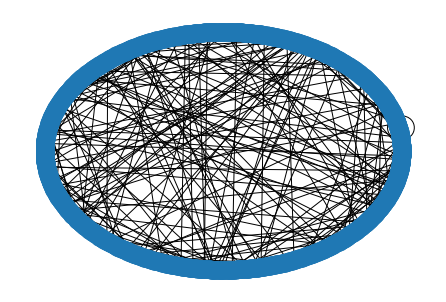

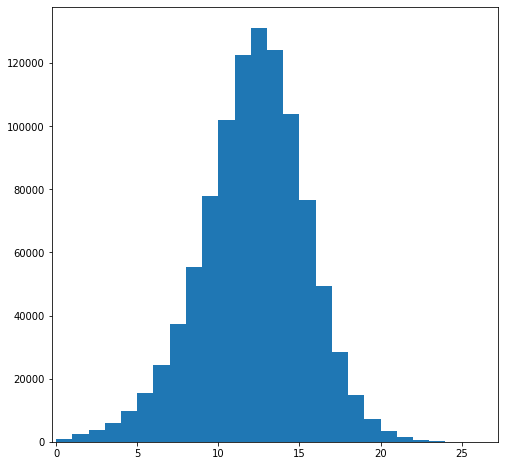

In [468]:
N=1000
Z=2
p=0.2
atalhos = int(p*N*Z/2)
print(atalhos)

grafo = cria_rede(N,Z,p)
nx.draw_circular(grafo)

distancias_2 = FindAllPathLengths(grafo)

beiradas = np.linspace(0,int(N/2)+1,int(N/2)+2)

aux = np.zeros(N*N)
for i in range(N):
    for j in range(N):
        aux[i*N + j] = distancias_2[i,j]
        
plt.figure(figsize=(8,8))
plt.hist(aux,beiradas)
a = max(aux) * 0.01
print(max(aux))
plt.xlim(-a,max(aux)+a+1)
plt.show()

Do caso anterior, p = 0.02, para o caso atual, p = 0.2, há uma grande mudança no histograma das distâncias. O valor da maior distância para p = 0.02 é 121, já para p = 0.2 esse valor cai para 26. As distribuições são semelhantes, porém para p = 0.02 o gráfico se estende bem mais, até 121.

N = 1000, Z = 2 e p = 2.5 (para obter os seis graus de separação devemos ter p ≅ 2.5)

2500
6.0


<function matplotlib.pyplot.show(close=None, block=None)>

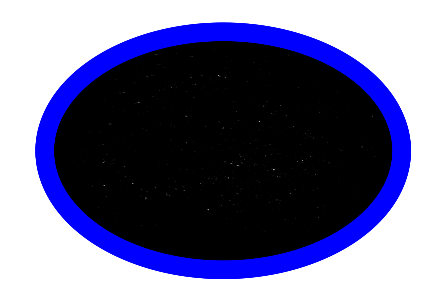

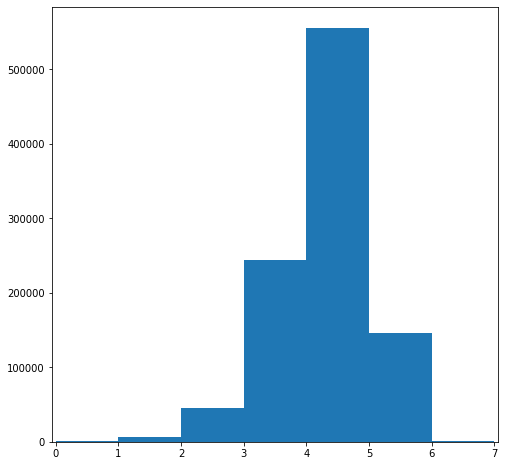

In [462]:
N=1000
Z=2
p=2.5
atalhos = int(p*N*Z/2)
print(atalhos)

grafo = cria_rede(N,Z,p)
nx.draw_circular(grafo)

distancias_2 = FindAllPathLengths(grafo)

beiradas = np.linspace(0,int(N/2)+1,int(N/2)+2)

aux = np.zeros(N*N)
for i in range(N):
    for j in range(N):
        aux[i*N + j] = distancias_2[i,j]
        
plt.figure(figsize=(8,8))
plt.hist(aux,beiradas)
a = max(aux) * 0.01
print(max(aux))
plt.xlim(-a,max(aux)+a+1)
plt.show()

10
9.818289090909095


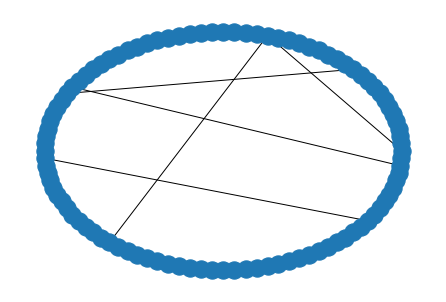

In [520]:
n = 1000
N=100
Z=2
p=0.1
print(int(p*N*Z/2))
media = 0
medias = np.zeros(n)

for i in range(n):
    grafo = cria_rede(N,Z,p)
    a = FindAveragePathLength(grafo)
    media += a
    medias[i] = a
print(media/n)

cores = np.zeros(N,dtype=str)
nx.draw_circular(grafo)

Neste sistema, existem no máximo 10 arestas longas, e como a distância média depende fortemente das posições dessas arestas (que são poucas), é esperado que esse valor varie conforme fazemos várias simulações.

In [516]:
N=50
Z=2
divs = 101
p = np.geomspace(0.001, 1000, divs, endpoint=True)

ds = np.zeros(divs)
atalhos = np.zeros(divs)

grafo = cria_rede(N,Z,0)
d_0 = FindAveragePathLength(grafo)

for i in range(divs):
    grafo = cria_rede(N,Z,p[i])
    ds[i] = FindAveragePathLength(grafo)/d_0
    atalhos[i] = int(Z*N*p[i]/2)
    print(i,end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

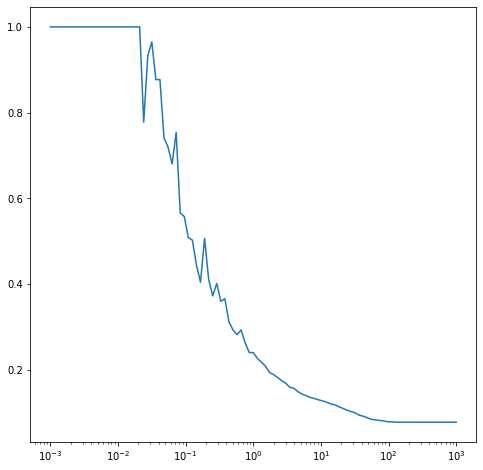

In [518]:
plt.figure(figsize=(8,8))
plt.semilogx(p,ds)
plt.show()

Para p muito pequeno, a probabilidade de existir uma aresta grande, um atalho, na rede é muito pequena, logo o valor da média da distância entre nós no caso de p pequeno é igual à distância média d_0 para p = 0, isto é, sem atalhos.

5
6.461224489795918


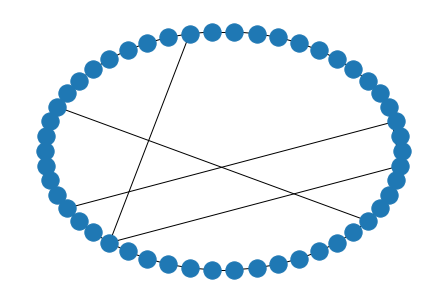

In [602]:
N=50
Z=2
p=0.1
print(int(p*N*Z/2))
grafo = cria_rede(N,Z,p)
nx.draw_circular(grafo)
d= FindAveragePathLength(grafo)
print(d)

4.431731731731731


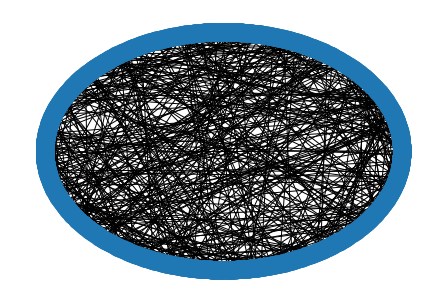

In [594]:
N=1000
Z=10

graf = nx.watts_strogatz_graph(N,Z,0.1)
nx.draw_circular(graf)
a= FindAveragePathLength(graf)
print(a)

4.431731731731731


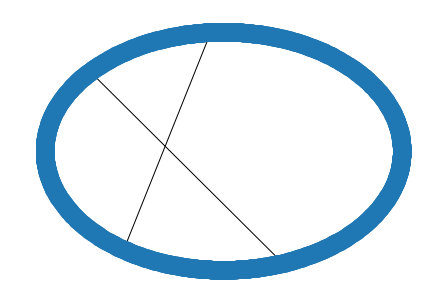

In [595]:
graf1 = nx.watts_strogatz_graph(N,Z,0.001)
nx.draw_circular(graf1)
b= FindAveragePathLength(graf1)
print(b)

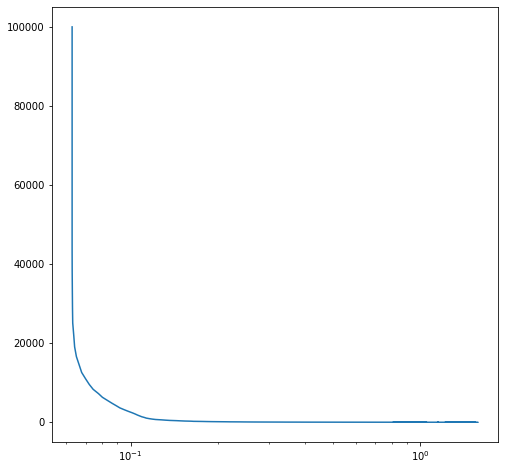

In [608]:
N=100
Z=2
divs = 101
p = np.geomspace(0.001, 1000, divs, endpoint=True)

ds_red = np.zeros(divs)
atalhos = np.zeros(divs)

for i in range(divs):
    grafo = cria_rede(N,Z,p[i])
    ds_red[i] = (FindAveragePathLength(grafo)*Z*np.pi)/N
    atalhos[i] = Z*N*p[i]/2

plt.figure(figsize=(8,8))
plt.semilogx(ds_red,atalhos)
plt.show()

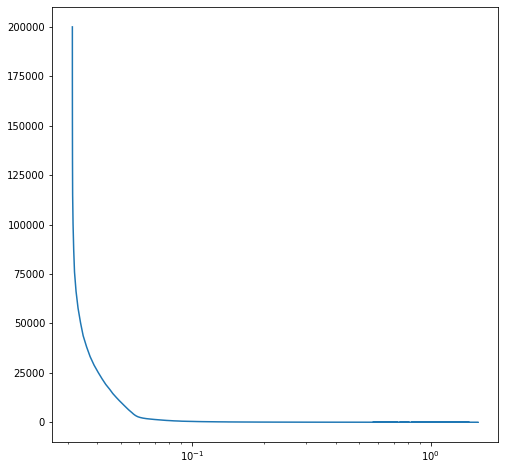

In [611]:
N=200
Z=2
divs = 101
p = np.geomspace(0.001, 1000, divs, endpoint=True)

ds_red = np.zeros(divs)
atalhos = np.zeros(divs)

for i in range(divs):
    grafo = cria_rede(N,Z,p[i])
    ds_red[i] = (FindAveragePathLength(grafo)*Z*np.pi)/N
    atalhos[i] = Z*N*p[i]/2

plt.figure(figsize=(8,8))
plt.semilogx(ds_red,atalhos)
plt.show()

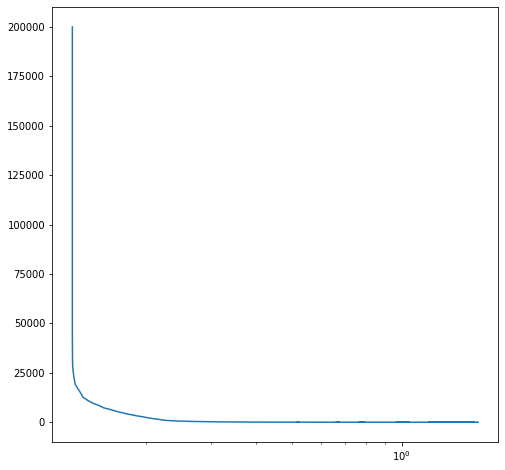

In [609]:
N=100
Z=4
divs = 101
p = np.geomspace(0.001, 1000, divs, endpoint=True)

ds_red = np.zeros(divs)
atalhos = np.zeros(divs)

for i in range(divs):
    grafo = cria_rede(N,Z,p[i])
    ds_red[i] = (FindAveragePathLength(grafo)*Z*np.pi)/N
    atalhos[i] = Z*N*p[i]/2

plt.figure(figsize=(8,8))
plt.semilogx(ds_red,atalhos)
plt.show()

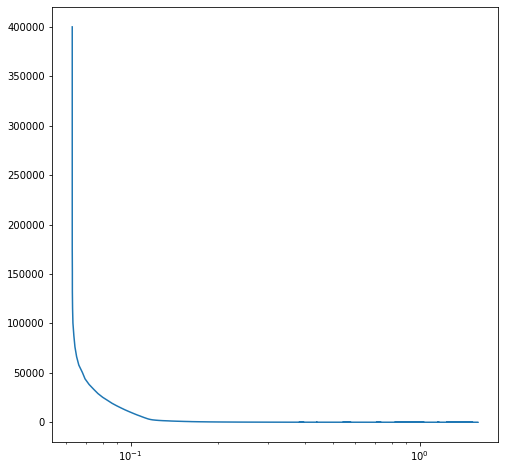

In [610]:
N=200
Z=4
divs = 101
p = np.geomspace(0.001, 1000, divs, endpoint=True)

ds_red = np.zeros(divs)
atalhos = np.zeros(divs)

for i in range(divs):
    grafo = cria_rede(N,Z,p[i])
    ds_red[i] = (FindAveragePathLength(grafo)*Z*np.pi)/N
    atalhos[i] = Z*N*p[i]/2

plt.figure(figsize=(8,8))
plt.semilogx(ds_red,atalhos)
plt.show()

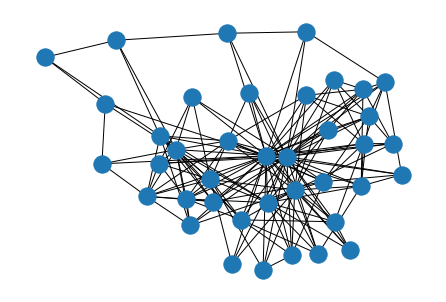

In [674]:
f = open("dados.txt", "r")

grafo = nx.Graph()
for line in f:
    line = line.split()
    grafo.add_edge(line[0], line[1])
    
nx.draw(grafo)